# 01. Importing Libraries and Data 

In [2]:
#importing libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#creating a path
path = r'C:\Users\canam\Achievement 4\Instacart Basket Analysis'

In [4]:
#importing merged version of data with customer columns 
df_ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_final.pkl'))

In [5]:
#checking the shape of dataframe
df_ords_prods_cust.shape

(30964564, 38)

In [6]:
df_ords_prods_cust.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'first_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spent', 'spending_flag', 'median_days_since_last_order',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', '_merge', 'region',
       'activity_flag', 'age_group', 'income_level', 'dependant_flag',
       'department'],
      dtype='object')

## Additional Charts

### Spending Habit by Loyalty Status

In [8]:
#creating a spending habit by loyalty status crosstab
spending_habit_by_loyalty_status_crosstab =  pd.crosstab(df_ords_prods_cust['loyalty_flag'], df_ords_prods_cust['spending_flag'], dropna = False)

In [9]:
#checking the spending habit by loyalty status crosstab
spending_habit_by_loyalty_status_crosstab

spending_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,13896,10270197
New customer,36362,4767333
Regular customer,47185,15829591


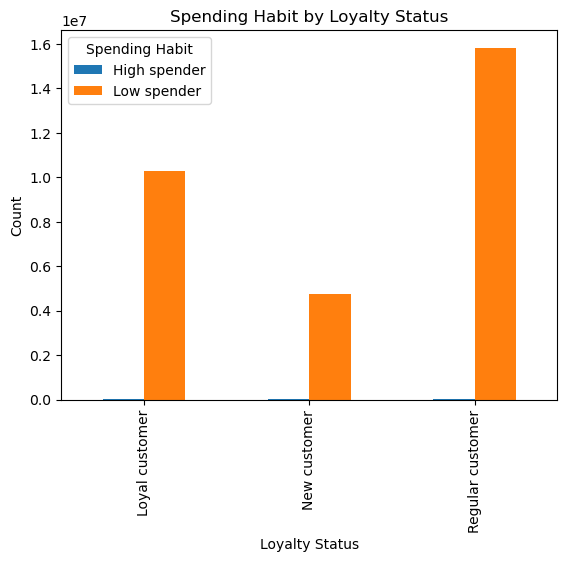

In [10]:
#creating a spending habit by loyalty status bar graph
spending_habit_by_loyalty_status = spending_habit_by_loyalty_status_crosstab.plot.bar()
plt.title('Spending Habit by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Count')
plt.legend(title='Spending Habit')

Regardless of loyalty status, the number of low spenders is much higher than the number of high spenders.

In [12]:
#saving spending_habit_by_loyalty_status bar grah 
spending_habit_by_loyalty_status.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'spending_habit_by_loyatly_status.png',)), bbox_inches='tight')

### Order Day of Week and Loyalty Status

In [14]:
#creating an orders_day_of_week and loyalty status crosstab
orders_day_of_week_loyalty_status_crosstab =  pd.crosstab(df_ords_prods_cust['orders_day_of_week'], df_ords_prods_cust['loyalty_flag'], dropna = False)

In [15]:
#checking the crosstab
orders_day_of_week_loyalty_status_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
orders_day_of_week,,,
0,1754731,984879,3169000
1,1843401,818902,2749383
2,1352343,625288,2047075
3,1266495,560418,1842622
4,1292042,535931,1797021
5,1456715,587718,1989296
6,1318366,690559,2282379


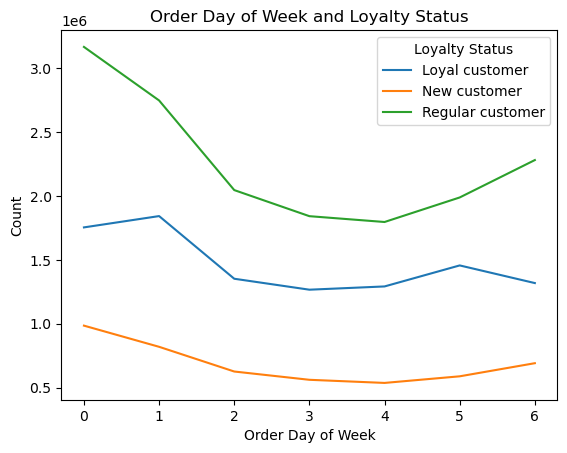

In [16]:
#creating an orders_day_of_week and loyalty status chart
orders_day_of_week_loyalty_status = orders_day_of_week_loyalty_status_crosstab.plot.line()
plt.title('Order Day of Week and Loyalty Status')
plt.xlabel('Order Day of Week')
plt.ylabel('Count')
plt.legend(title='Loyalty Status')

The busiest order days are still Saturday and Sunday and the slowest days are Tuesday and Wednesday regardless of loyalty status.  Loyal customers order more on Sunday than they do Saturday.  New and regular customers order more on Saturday than on Sunday.  Loyal customers also order more on Thursday than on Friday while new and regular customers order more on Friday than on Thursday.

In [18]:
#saving orders_day_of_week and loyalty status bar grah 
orders_day_of_week_loyalty_status.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'orders_day_of_week_and_loyalty_status.png',)), bbox_inches='tight')

### Order Hour of Day and Loyalty Status 

In [20]:
#creating an order_hour_of_day and loyalty status crosstab
order_hour_of_day_loyalty_status_crosstab =  pd.crosstab(df_ords_prods_cust['order_hour_of_day'], df_ords_prods_cust['loyalty_flag'], dropna = False)

In [21]:
#checking the crosstab
order_hour_of_day_loyalty_status_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
order_hour_of_day,,,
0,61748,35311,110983
1,30179,20674,58768
2,17788,12241,35662
3,13374,9510,25912
4,16882,8442,25439
5,29350,12475,42593
6,112865,33901,134247
7,346694,102170,414349
8,643895,208124,807091


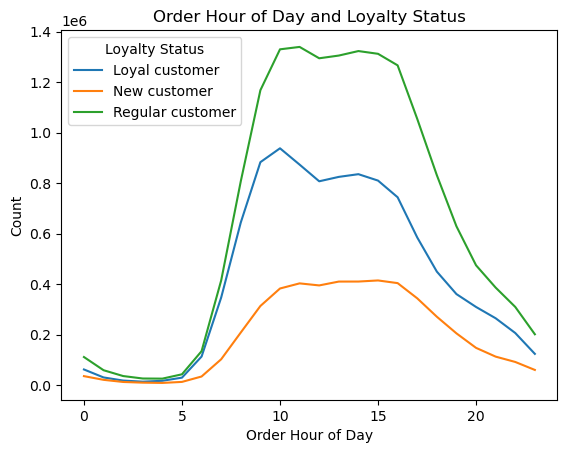

In [22]:
#creating an order_hour_of_day and loyalty status chart
order_hour_of_day_loyalty_status = order_hour_of_day_loyalty_status_crosstab.plot.line()
plt.title('Order Hour of Day and Loyalty Status')
plt.xlabel('Order Hour of Day')
plt.ylabel('Count')
plt.legend(title='Loyalty Status')

In [23]:
order_hour_of_day_loyalty_status.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'order_hour_of_day_and_loyalty_status.png',)), bbox_inches='tight')

The busiest and least busiest times are the same regardless of loyalty status.

### Frequency by Region

In [26]:
#creating a frequency by region crosstab
frequency_by_region_crosstab =  pd.crosstab(df_ords_prods_cust['region'], df_ords_prods_cust['frequency_flag'], dropna = False)

In [27]:
frequency_by_region_crosstab

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,4935393,690030,1636090
Northeast,3740982,496911,1226792
South,7073789,968006,2269344
West,5454312,740028,1732887


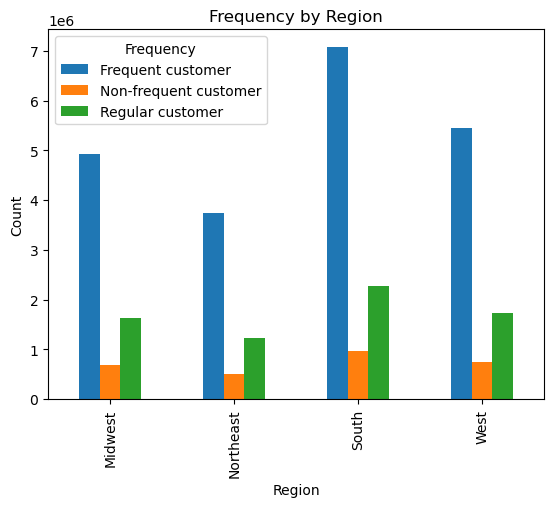

In [28]:
#creating a frequency by region chart
frequency_by_region = frequency_by_region_crosstab.plot.bar()
plt.title('Frequency by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Frequency')

For each region, there are more frequent customers than there are non-frequent and regular customers combined. 

In [30]:
#saving frequency by region graph
frequency_by_region.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'frequency_by_region',)), bbox_inches='tight')

## Loyalty by Region

In [32]:
#creating a loyalty by region crosstab
loyalty_by_region_crosstab =  pd.crosstab(df_ords_prods_cust['region'], df_ords_prods_cust['loyalty_flag'], dropna = False)

In [33]:
loyalty_by_region_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744
South,3405844,1593664,5311631
West,2662690,1231114,4033423


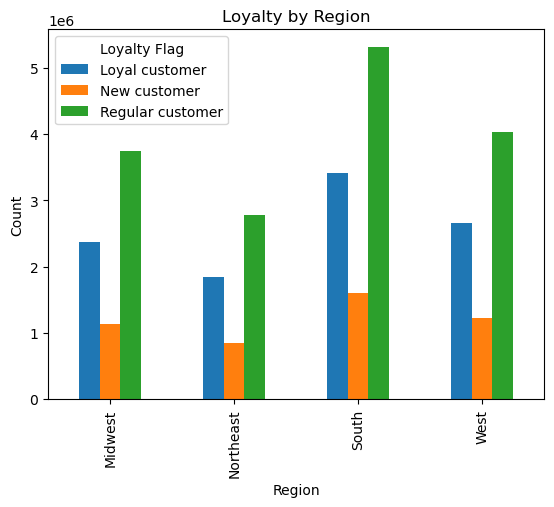

In [34]:
#creating a loyalty by region chart
loyalty_by_region = loyalty_by_region_crosstab.plot.bar()
plt.title('Loyalty by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Loyalty Flag')

For each region, there are more regular customers than loyal or new.  

In [36]:
#saving loyalty by region graph
loyalty_by_region.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'loyalty_by_region',)), bbox_inches='tight')

### Frequency by age

In [38]:
#creating a frequency by age crosstab
frequency_by_age_crosstab =  pd.crosstab(df_ords_prods_cust['age_group'], df_ords_prods_cust['frequency_flag'], dropna = False)

In [66]:
frequency_by_age_crosstab

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
Adult,7299311,986819,2378980
Middle Adult,8274189,1148024,2681697
Senior Adult,5630976,760132,1804436


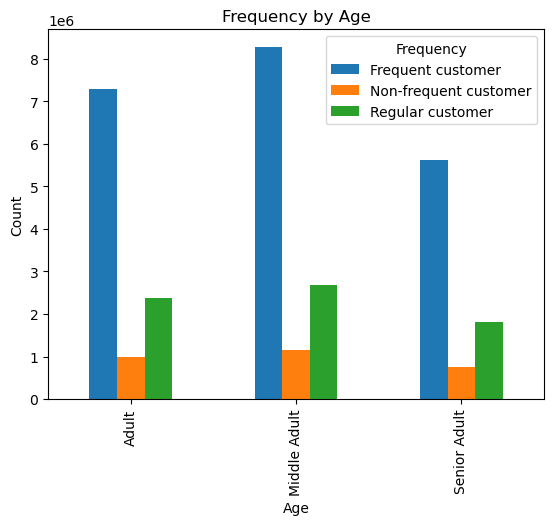

In [70]:
#creating a frequency by age chart
frequency_by_age = frequency_by_age_crosstab.plot.bar()
plt.title('Frequency by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Frequency')

For each age group, there are more frequent customers than regular and non-frequent customers combined.  Middle adults have the largest group of frequent customers.

In [73]:
#saving frequency by age chart
frequency_by_age.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'frequency_by_age',)), bbox_inches='tight')

### Loyalty by Age

In [76]:
#creating a loyalty by age crosstab
loyalty_by_age_crosstab =  pd.crosstab(df_ords_prods_cust['age_group'], df_ords_prods_cust['loyalty_flag'], dropna = False)

In [78]:
#checking the crosstab
loyalty_by_age_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
age_group,,,
Adult,3519386,1639734,5505990
Middle Adult,4040749,1887302,6175859
Senior Adult,2723958,1276659,4194927


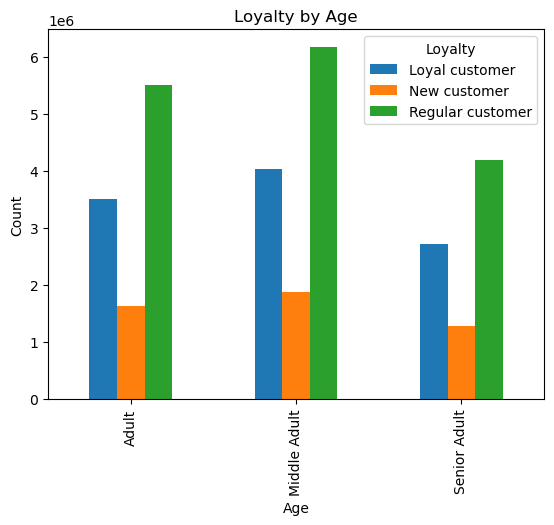

In [173]:
#creating a loyalty by age chart
loyalty_by_age = loyalty_by_age_crosstab.plot.bar()
plt.title('Loyalty by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Loyalty')

For each age group, there are more regular customers than there are loyal and new customers.  

In [175]:
#saving loyalty by age chart
loyalty_by_age.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'loyalty_by_age',)), bbox_inches='tight')

### Frequency by Dependant Status

In [87]:
#creating a frequency by dependant status  crosstab
frequency_by_dependant_status_crosstab =  pd.crosstab(df_ords_prods_cust['dependant_flag'], df_ords_prods_cust['frequency_flag'], dropna = False)

In [91]:
#checking the crosstab
frequency_by_dependant_status_crosstab

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
dependant_flag,,,
Has Dependants,15919339,2178469,5127075
No Dependants,5285137,716506,1738038


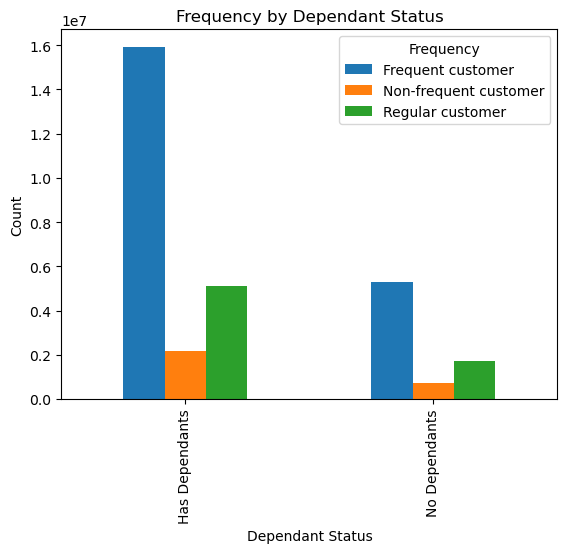

In [95]:
#creating a frequency by dependant status chart
frequency_by_dependant_status = frequency_by_dependant_status_crosstab.plot.bar()
plt.title('Frequency by Dependant Status')
plt.xlabel('Dependant Status')
plt.ylabel('Count')
plt.legend(title='Frequency')

There are significantly more frequent customers with dependants than without.

In [98]:
#saving frequency by dependant status
frequency_by_dependant_status.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'frequency_by_dependant_status',)), bbox_inches='tight')

### Loyalty by Dependant Status

In [101]:
#creating a loyalty by dependant status crosstab
loyalty_by_dependant_status_crosstab =  pd.crosstab(df_ords_prods_cust['dependant_flag'], df_ords_prods_cust['loyalty_flag'], dropna = False)

In [103]:
#checking the crosstab
loyalty_by_dependant_status_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
dependant_flag,,,
Has Dependants,7695249,3602430,11927204
No Dependants,2588844,1201265,3949572


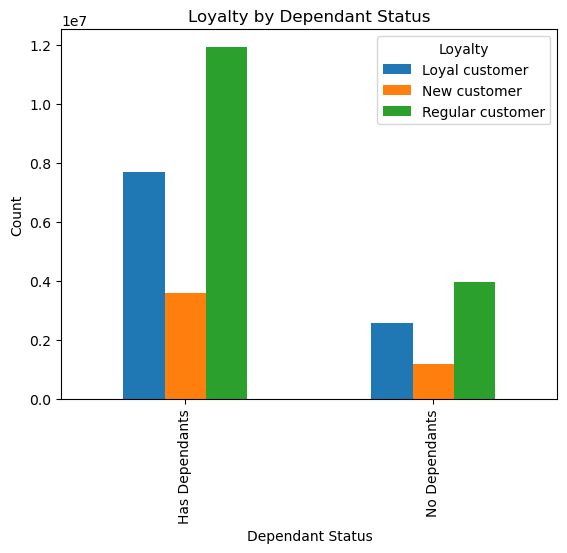

In [105]:
#creating a loyalty by dependant status chart
loyalty_by_dependant_status = loyalty_by_dependant_status_crosstab.plot.bar()
plt.title('Loyalty by Dependant Status')
plt.xlabel('Dependant Status')
plt.ylabel('Count')
plt.legend(title='Loyalty')

There are significantly more loyal and regular customers with dependants than without.

In [108]:
#saving loyalty by dependant status
loyalty_by_dependant_status.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'loyalty_by_dependant_status',)), bbox_inches='tight')

### Marital Status Distribution

In [112]:
#creating a value count table for marital status
marital_status_distribution = df_ords_prods_cust['marital_status'].value_counts()

In [116]:
#checking value count table
marital_status_distribution

marital_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

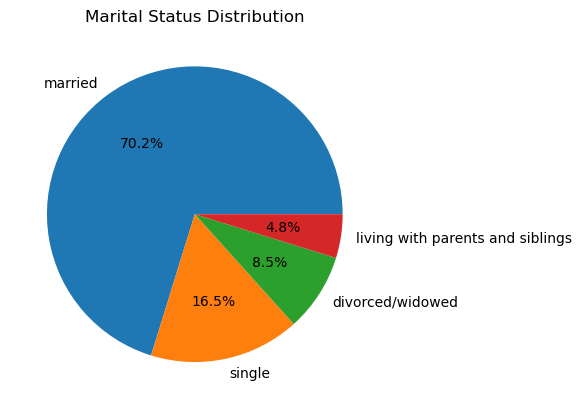

In [118]:
#creating a marital status distribution pie
marital_status_distribution_pie = plt.pie(marital_status_distribution, 
                            labels = marital_status_distribution.index,
                            autopct='%.1f%%')
plt.title('Marital Status Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'marital_status_distribution_pie.png'), bbox_inches = 'tight') #saving pie chart

### Product price range distribution

In [125]:
#creating a value count table for product price range  
product_price_range_distribution = df_ords_prods_cust['price_range_loc'].value_counts()

In [127]:
#checking the value count table
product_price_range_distribution

price_range_loc
Mid-range product     20896648
Low-range product      9674840
High-range product      393076
Name: count, dtype: int64

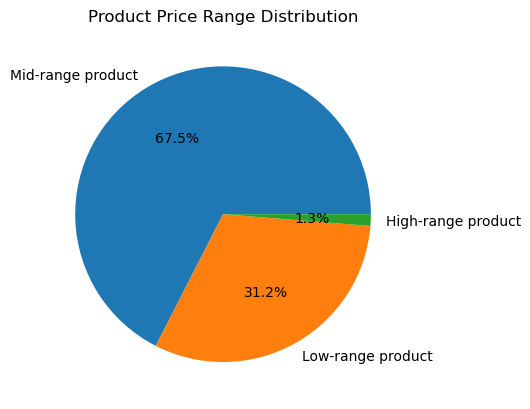

In [129]:
#creating a product_price_range_distribution pie
product_price_range_distribution_pie = plt.pie(product_price_range_distribution, 
                            labels = product_price_range_distribution.index,
                            autopct='%.1f%%')
plt.title('Product Price Range Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'product_price_range_distribution_pie.png'), bbox_inches = 'tight') #saving pie chart

The majority of products purchased are mid-range products.  

### Product Price Range by Age

In [135]:
#creating a product price range by age crosstab
product_price_range_by_age_crosstab =  pd.crosstab(df_ords_prods_cust['age_group'], df_ords_prods_cust['price_range_loc'], dropna = False)

In [137]:
#checking the crosstab
product_price_range_by_age_crosstab

price_range_loc,High-range product,Low-range product,Mid-range product
age_group,,,
Adult,134207,3334414,7196489
Middle Adult,153231,3781327,8169352
Senior Adult,105638,2559099,5530807


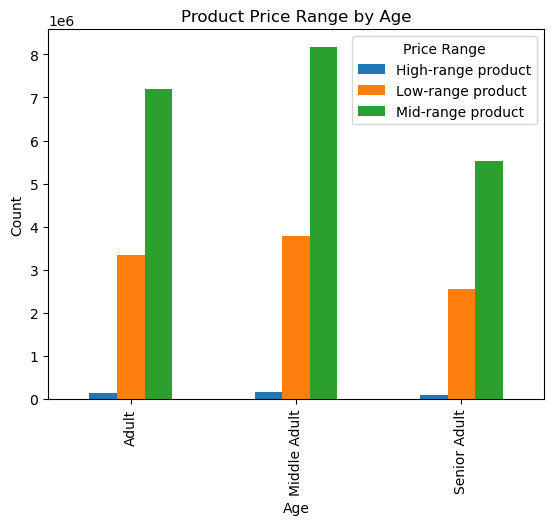

In [139]:
#creating a product price range by age chart
product_price_range_by_age = product_price_range_by_age_crosstab.plot.bar()
plt.title('Product Price Range by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Price Range')

Regardless of age group, the majority of products purchased were mid-range products.

In [141]:
#saving product price range by age graph
product_price_range_by_age.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'product_price_range_by_age',)), bbox_inches='tight')

### Product Price Range by Income 

In [144]:
#creating a product price range by income crosstab
product_price_range_by_income_crosstab =  pd.crosstab(df_ords_prods_cust['income_level'], df_ords_prods_cust['price_range_loc'], dropna = False)

In [146]:
#checking the crosstab
product_price_range_by_income_crosstab

price_range_loc,High-range product,Low-range product,Mid-range product
income_level,,,
High Income,161417,3442585,7966458
Low Income,29419,1755433,2667536
Middle Income,202240,4476822,10262654


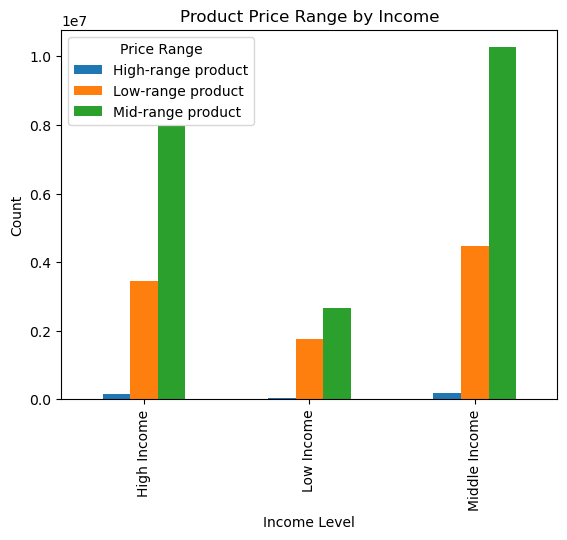

In [149]:
#creating a product price range by income chart
product_price_range_by_income = product_price_range_by_income_crosstab.plot.bar()
plt.title('Product Price Range by Income')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.legend(title='Price Range')

Regardless of income, the majority of products purchased are mid-range products.

In [154]:
#saving product price range by income graph
product_price_range_by_income.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'product_price_range_by_income',)), bbox_inches='tight')

### Product Price Range by Loyalty

In [156]:
#creating a product price range by loyalty crosstab
product_price_range_by_loyalty_crosstab =  pd.crosstab(df_ords_prods_cust['loyalty_flag'], df_ords_prods_cust['price_range_loc'], dropna = False)

In [158]:
#checking the crosstab
product_price_range_by_loyalty_crosstab

price_range_loc,High-range product,Low-range product,Mid-range product
loyalty_flag,,,
Loyal customer,118606,3214690,6950797
New customer,65028,1501288,3237379
Regular customer,209442,4958862,10708472


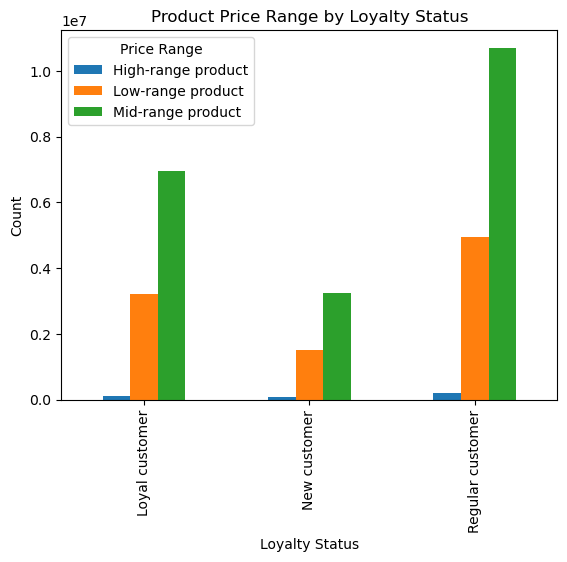

In [160]:
#creating a product price range by loyalty chart
product_price_range_by_loyalty = product_price_range_by_loyalty_crosstab.plot.bar()
plt.title('Product Price Range by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Count')
plt.legend(title='Price Range')

Regardless of loyalty status, most products purchased were mid-range products.

In [163]:
#saving product price range by loyalty graph
product_price_range_by_loyalty.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'product_price_range_by_loyalty',)), bbox_inches='tight')

### Product Price Range by Marital Status

In [165]:
#creating a product price range by marital status crosstab
product_price_range_by_marital_status_crosstab =  pd.crosstab(df_ords_prods_cust['marital_status'], df_ords_prods_cust['price_range_loc'], dropna = False)

In [167]:
#checking the crosstab
product_price_range_by_marital_status_crosstab

price_range_loc,High-range product,Low-range product,Mid-range product
marital_status,,,
divorced/widowed,33694,826382,1785195
living with parents and siblings,18804,461807,1000561
married,277990,6793795,14671926
single,62588,1592856,3438966


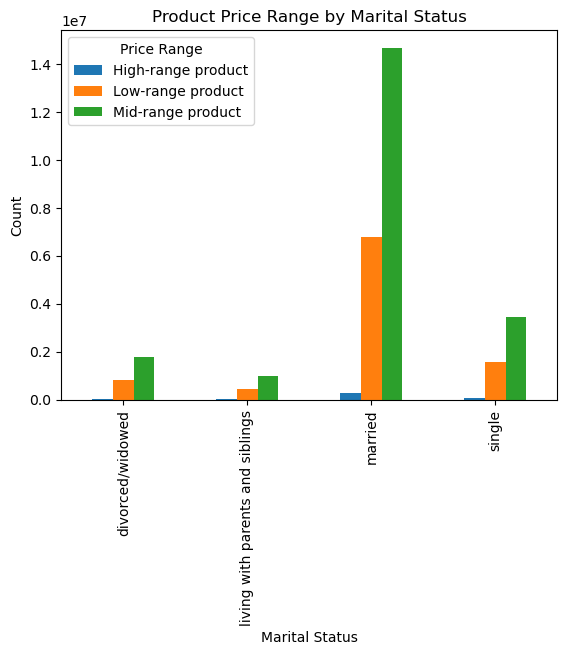

In [169]:
#creating a product price range by marital status chart
product_price_range_by_marital_status = product_price_range_by_marital_status_crosstab.plot.bar()
plt.title('Product Price Range by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Price Range')

High-range products are purchased almost only by married customers.  

In [171]:
#saving product price range by marital status graph
product_price_range_by_marital_status.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'product_price_range_by_marital_status',)), bbox_inches='tight')

### Frequency by marital status

In [185]:
#creating a frequency by marital status crosstab
frequency_by_marital_status_crosstab =  pd.crosstab(df_ords_prods_cust['marital_status'], df_ords_prods_cust['frequency_flag'], dropna = False)

In [187]:
#checking the crosstab
frequency_by_marital_status_crosstab

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
marital_status,,,
divorced/widowed,1819123,243934,582214
living with parents and siblings,1030514,138646,312012
married,14888825,2039823,4815063
single,3466014,472572,1155824


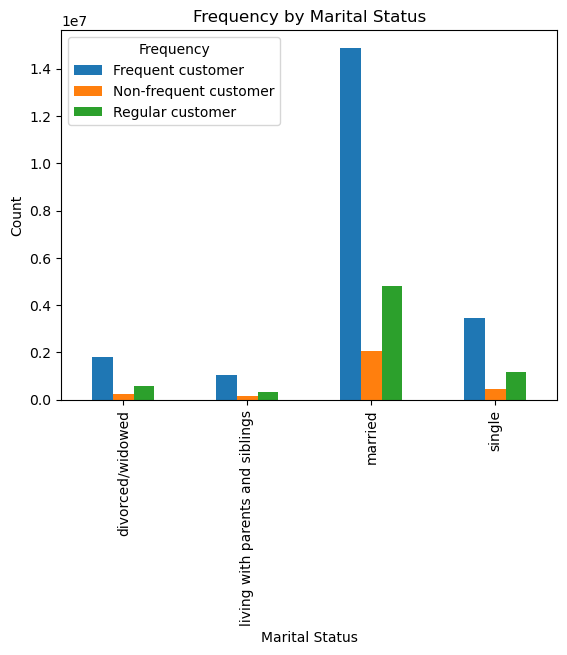

In [189]:
#creating a frequency by marital status chart
frequency_by_marital_status = frequency_by_marital_status_crosstab.plot.bar()
plt.title('Frequency by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Frequency')

There are signicantly more frequent customers who are married than single, living with parents and siblings, and divorced/widowed.

In [191]:
#saving frequency by marital status graph
frequency_by_marital_status.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'frequency_by_marital_status',)), bbox_inches='tight')

### Loyalty by marital status

In [194]:
#creating a loyalty by marital status crosstab
loyalty_by_marital_status_crosstab =  pd.crosstab(df_ords_prods_cust['marital_status'], df_ords_prods_cust['loyalty_flag'], dropna = False)

In [196]:
#checking crosstab
loyalty_by_marital_status_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
marital_status,,,
divorced/widowed,882722,403781,1358768
living with parents and siblings,492749,221779,766644
married,7202500,3380651,11160560
single,1706122,797484,2590804


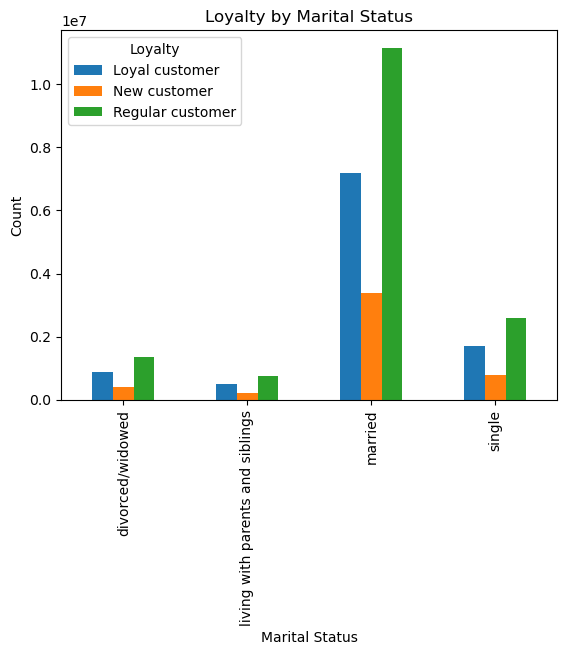

In [198]:
#creating a loyalty by marital status chart
loyalty_by_marital_status = loyalty_by_marital_status_crosstab.plot.bar()
plt.title('Loyalty by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Loyalty')

In [200]:
#saving loyalty by marital status graph
loyalty_by_marital_status.figure.savefig((os.path.join(path, '04 Analysis','Visualizations', 'loyalty_by_marital_status',)), bbox_inches='tight')